# Agile Power flow calculation 

This notebook perform the power flow calculation with Newton raphson algorithm for the case study demonstration of Agile project. 

### Creating the low voltage distribution network

In [1]:
#import the pandapower module
import pandapower as pp
import pandas as pd
import pandapower.plotting as plot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create an empty network
net = pp.create_empty_network()

#### Creating buses

In [3]:
bus1 = pp.create_bus(net, name = 'Upper grid Bus 0', vn_kv= 10, type = "b")
bus2 = pp.create_bus(net, name = 'LV Bus 1', vn_kv= 1, type = "b")
bus3 = pp.create_bus(net, name = 'LV Bus 2', vn_kv= 1, type = "b")
bus4 = pp.create_bus(net, name = 'LV Bus 3', vn_kv= 1, type = "b")
bus5 = pp.create_bus(net, name = 'LV Bus 4', vn_kv= 1, type = "b")
bus6 = pp.create_bus(net, name = 'LV Bus 5', vn_kv= 1, type = "b")
bus7 = pp.create_bus(net, name = 'LV Bus 6', vn_kv= 1, type = "b")
bus8 = pp.create_bus(net, name = 'LV Bus 7', vn_kv= 1, type = "b")
bus9 = pp.create_bus(net, name = 'LV Bus 8', vn_kv= 1, type = "b")
bus10 = pp.create_bus(net, name = 'LV Bus 9', vn_kv= 1, type = "b")
bus11 = pp.create_bus(net, name = 'LV Bus 10', vn_kv= 1, type = "b")
bus12 = pp.create_bus(net, name = 'LV Bus 11', vn_kv= 1, type = "b")
bus13 = pp.create_bus(net, name = 'LV Bus 12', vn_kv= 1, type = "b")
bus14 = pp.create_bus(net, name = 'LV Bus 13', vn_kv= 1, type = "b")
bus15 = pp.create_bus(net, name = 'LV Bus 14', vn_kv= 1, type = "b")

In [4]:
#show bus table
net.bus

,name,vn_kv,type,zone,in_service
0,Upper grid Bus 0,10.0,b,None,True
1,LV Bus 1,1.0,b,None,True
2,LV Bus 2,1.0,b,None,True
3,LV Bus 3,1.0,b,None,True
4,LV Bus 4,1.0,b,None,True
5,LV Bus 5,1.0,b,None,True
6,LV Bus 6,1.0,b,None,True
7,LV Bus 7,1.0,b,None,True
8,LV Bus 8,1.0,b,None,True
9,LV Bus 9,1.0,b,None,True


#### Add external grid connection

In [5]:
#Create external grid connection 
pp.create_ext_grid (net,bus1, vm_pu=1.02,va_degree=50)

#Show the external grid
net.ext_grid

,name,bus,vm_pu,va_degree,slack_weight,in_service
0,None,0,1.02,50.0,1.0,True


#### Add line connection 

In [6]:
pp.create_line_from_parameters(net, bus1, bus2, length_km=0.5, 
                              r_ohm_per_km=0.001, x_ohm_per_km=0.12,
                               c_nf_per_km = 10, max_i_ka = 0.4, name = "line 1")

pp.create_line_from_parameters(net, bus2, bus3, length_km=0.5, 
                              r_ohm_per_km=0.001, x_ohm_per_km=0.12,
                               c_nf_per_km = 10, max_i_ka = 0.4, name = "line 2")

pp.create_line_from_parameters(net, bus3, bus4, length_km=0.5, 
                              r_ohm_per_km=0.001, x_ohm_per_km=0.12,
                               c_nf_per_km = 10, max_i_ka = 0.4, name = "line 3")

pp.create_line_from_parameters(net, bus4, bus5, length_km=0.5, 
                              r_ohm_per_km=0.001, x_ohm_per_km=0.12,
                               c_nf_per_km = 10, max_i_ka = 0.4, name = "line 4")

pp.create_line_from_parameters(net, bus5, bus6, length_km=0.5, 
                              r_ohm_per_km=0.001, x_ohm_per_km=0.12,
                               c_nf_per_km = 10, max_i_ka = 0.4, name = "line 5")

pp.create_line_from_parameters(net, bus6, bus7, length_km=0.5, 
                              r_ohm_per_km=0.001, x_ohm_per_km=0.12,
                               c_nf_per_km = 10, max_i_ka = 0.4, name = "line 6")

pp.create_line_from_parameters(net, bus4, bus8, length_km=0.5, 
                              r_ohm_per_km=0.001, x_ohm_per_km=0.12,
                               c_nf_per_km = 10, max_i_ka = 0.4, name = "line 7")

pp.create_line_from_parameters(net, bus9, bus8, length_km=0.5, 
                              r_ohm_per_km=0.001, x_ohm_per_km=0.12,
                               c_nf_per_km = 10, max_i_ka = 0.4, name = "line 8")

pp.create_line_from_parameters(net, bus8, bus10, length_km=0.5, 
                              r_ohm_per_km=0.001, x_ohm_per_km=0.12,
                               c_nf_per_km = 10, max_i_ka = 0.4, name = "line 9")

pp.create_line_from_parameters(net, bus10, bus11, length_km=0.5, 
                              r_ohm_per_km=0.001, x_ohm_per_km=0.12,
                               c_nf_per_km = 10, max_i_ka = 0.4, name = "line 10")

pp.create_line_from_parameters(net, bus11, bus12, length_km=0.5, 
                              r_ohm_per_km=0.001, x_ohm_per_km=0.12,
                               c_nf_per_km = 10, max_i_ka = 0.4, name = "line 11")

pp.create_line_from_parameters(net, bus1, bus13, length_km=0.5, 
                              r_ohm_per_km=0.001, x_ohm_per_km=0.12,
                               c_nf_per_km = 10, max_i_ka = 0.4, name = "line 12")

pp.create_line_from_parameters(net, bus13, bus14, length_km=0.5, 
                              r_ohm_per_km=0.001, x_ohm_per_km=0.12,
                               c_nf_per_km = 10, max_i_ka = 0.4, name = "line 13")

pp.create_line_from_parameters(net, bus14, bus15, length_km=0.5, 
                              r_ohm_per_km=0.001, x_ohm_per_km=0.12,
                               c_nf_per_km = 10, max_i_ka = 0.4, name = "line 14")

13

In [7]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,line 1,None,0,1,0.5,0.001,0.12,10.0,0.0,0.4,1.0,1,None,True
1,line 2,None,1,2,0.5,0.001,0.12,10.0,0.0,0.4,1.0,1,None,True
2,line 3,None,2,3,0.5,0.001,0.12,10.0,0.0,0.4,1.0,1,None,True
3,line 4,None,3,4,0.5,0.001,0.12,10.0,0.0,0.4,1.0,1,None,True
4,line 5,None,4,5,0.5,0.001,0.12,10.0,0.0,0.4,1.0,1,None,True
5,line 6,None,5,6,0.5,0.001,0.12,10.0,0.0,0.4,1.0,1,None,True
6,line 7,None,3,7,0.5,0.001,0.12,10.0,0.0,0.4,1.0,1,None,True
7,line 8,None,8,7,0.5,0.001,0.12,10.0,0.0,0.4,1.0,1,None,True
8,line 9,None,7,9,0.5,0.001,0.12,10.0,0.0,0.4,1.0,1,None,True
9,line 10,None,9,10,0.5,0.001,0.12,10.0,0.0,0.4,1.0,1,None,True


### Add load


In [8]:
pp.create_load(net, bus2, p_mw=0.7936, q_mvar=0.1855, scaling=0.6, name="load 1")
pp.create_load(net, bus3, p_mw=0, q_mvar=0, scaling=0.6, name="load 2")
pp.create_load(net, bus4, p_mw=0.0201, q_mvar=0.0084, scaling=0.6, name="load 3")
pp.create_load(net, bus5, p_mw=0.0173, q_mvar=0.0084, scaling=0.6, name="load 4")
pp.create_load(net, bus6, p_mw=0.0291, q_mvar=0.0073, scaling=0.6, name="load 5")
pp.create_load(net, bus7, p_mw=0.0219, q_mvar=0.0055, scaling=0.6, name="load 6")
pp.create_load(net, bus8, p_mw=-0.1969, q_mvar=0.0019, scaling=0.6, name="load 7")
pp.create_load(net, bus9, p_mw=0.0235, q_mvar=0.0059, scaling=0.6, name="load 8")
pp.create_load(net, bus10, p_mw=0.0229, q_mvar=0.0142, scaling=0.6, name="load 9")
pp.create_load(net, bus11, p_mw=0.0217, q_mvar=0.0065, scaling=0.6, name="load 10")
pp.create_load(net, bus12, p_mw=0.0132, q_mvar=0.0033, scaling=0.6, name="load 11")
pp.create_load(net, bus13, p_mw=0.6219, q_mvar=0.1291, scaling=0.6, name="load 12")
pp.create_load(net, bus14, p_mw=0.0014, q_mvar=0.0008, scaling=0.6, name="load 13")
pp.create_load(net, bus15, p_mw=0.0224, q_mvar=0.0083, scaling=0.6, name="load 14")


13

In [9]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,load 1,1,0.7936,0.1855,0.0,0.0,NaN,0.6,True,wye
1,load 2,2,0.0000,0.0000,0.0,0.0,NaN,0.6,True,wye
2,load 3,3,0.0201,0.0084,0.0,0.0,NaN,0.6,True,wye
3,load 4,4,0.0173,0.0084,0.0,0.0,NaN,0.6,True,wye
4,load 5,5,0.0291,0.0073,0.0,0.0,NaN,0.6,True,wye
5,load 6,6,0.0219,0.0055,0.0,0.0,NaN,0.6,True,wye
6,load 7,7,-0.1969,0.0019,0.0,0.0,NaN,0.6,True,wye
7,load 8,8,0.0235,0.0059,0.0,0.0,NaN,0.6,True,wye
8,load 9,9,0.0229,0.0142,0.0,0.0,NaN,0.6,True,wye
9,load 10,10,0.0217,0.0065,0.0,0.0,NaN,0.6,True,wye


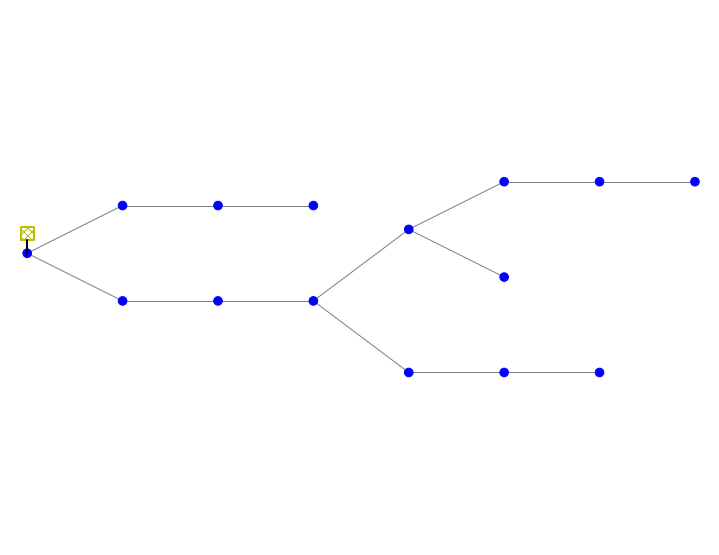

<AxesSubplot:>

In [16]:

plot.simple_plot(net, show_plot=True)

## Running power flow calculation

Calculate the power flow with *Backward/Foward Seweep*  algorithm

In [10]:
pp.runpp(net, algorithm="bfsw")

In [11]:
pp.runpp(net)

In [12]:
net

This pandapower network includes the following parameter tables:
   - bus (15 elements)
   - load (14 elements)
   - ext_grid (1 element)
   - line (14 elements)
 and the following results tables:
   - res_bus (15 elements)
   - res_line (14 elements)
   - res_ext_grid (1 element)
   - res_load (14 elements)

In [13]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.020000,0.000000,-0.847269,-0.231763
1,1.019910,-0.015155,0.476160,0.111300
2,1.017705,0.039913,0.000000,0.000000
3,1.015501,0.095221,0.012060,0.005040
4,1.014722,-0.041142,0.010380,0.005040
5,1.014251,-0.143140,0.017460,0.004380
6,1.014049,-0.186969,0.013140,0.003300
7,1.014392,0.327223,-0.118140,0.001140
8,1.014175,0.280205,0.014100,0.003540
9,1.013518,0.211662,0.013740,0.008520


In [14]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,0.459848,0.148894,-0.459847,-0.148922,1.122903e-06,-0.000029,0.027359,0.273620,0.273620,1.020000,0.000000,1.019910,-0.015155,68.405037
1,-0.016313,0.037622,0.016314,-0.037527,8.083035e-07,0.000095,0.023213,0.023214,0.023214,1.019910,-0.015155,1.017705,0.039913,5.803494
2,-0.016314,0.037527,0.016315,-0.037432,8.083624e-07,0.000095,0.023214,0.023215,0.023215,1.017705,0.039913,1.015501,0.095221,5.803705
3,0.040981,0.012891,-0.040981,-0.012786,8.948849e-07,0.000106,0.024425,0.024425,0.024425,1.015501,0.095221,1.014722,-0.041142,6.106332
4,0.030601,0.007746,-0.030600,-0.007689,4.838489e-07,0.000056,0.017960,0.017960,0.017960,1.014722,-0.041142,1.014251,-0.143140,4.490058
5,0.013140,0.003309,-0.013140,-0.003300,8.924690e-08,0.000009,0.007713,0.007714,0.007714,1.014251,-0.143140,1.014049,-0.186969,1.928401
6,-0.069356,0.019500,0.069359,-0.019200,2.516674e-06,0.000300,0.040961,0.040961,0.040961,1.015501,0.095221,1.014392,0.327223,10.240217
7,-0.014100,-0.003540,0.014100,0.003551,1.027348e-07,0.000011,0.008276,0.008276,0.008276,1.014175,0.280205,1.014392,0.327223,2.068993
8,0.034681,0.014509,-0.034680,-0.014428,6.867442e-07,0.000081,0.021397,0.021397,0.021397,1.014392,0.327223,1.013518,0.211662,5.349282
9,0.020940,0.005908,-0.020940,-0.005882,2.304340e-07,0.000026,0.012394,0.012395,0.012395,1.013518,0.211662,1.013159,0.141722,3.098646
